
# Project: Investigate a Dataset - TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. The dataset have these following columns: ('id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj')


### Question(s) for Analysis
>Which genres are most popular from year to year?

>Is revenue and release year have any correlation?

>Correlation between budget and release years?

>Top 10 directors who produces the most movies

>Longest to shortest movie

In [1]:
# this is import statements which include all packeges needed for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# load dataset
df = pd.read_csv('tmdb-movies.csv')
# view tmdb-movies dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# number of rows and columns
df.shape

(10866, 21)

In [4]:
# function to view information of dataset and each column
def view_info():
    df.info()

In [5]:
# view information about each column
view_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## Descriptive Statstics

In [6]:
# explore data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



## Data Cleaning

In [7]:
# drop columns from tmdb-movies dataset
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'budget_adj', 'revenue_adj'], axis = 1, inplace = True)
# confirm changes
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


In [9]:
#check the columns
view_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   director              10822 non-null  object 
 5   runtime               10866 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   vote_count            10866 non-null  int64  
 9   vote_average          10866 non-null  float64
 10  release_year          10866 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 933.9+ KB


In [10]:
# drop production_companies column
df.drop(['production_companies'], axis = 1, inplace = True)

In [11]:
# replace 0.0 with nan value
df['runtime'] =df['runtime'].replace(0, np.NAN)
# remove null values
df.dropna(inplace=True)

In [12]:
# check for duplicates
df.duplicated().sum()

1

In [13]:
# remove duplicates
df.drop_duplicates(inplace=True)

In [14]:
# rename original_title column to title
df.rename(columns = {'original_title':'title'}, inplace = True)

In [15]:
# split genres column by | character
df["genres"] = df["genres"].str.split("|")
# explode the dataset
df = df.explode("genres")

In [16]:
# confirm changes
df.head()

,popularity,budget,revenue,title,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124.0,Action,5562,6.5,2015
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124.0,Adventure,5562,6.5,2015
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124.0,Science Fiction,5562,6.5,2015
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124.0,Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120.0,Action,6185,7.1,2015


In [17]:
#check the dataset
view_info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26809 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    26809 non-null  float64
 1   budget        26809 non-null  int64  
 2   revenue       26809 non-null  int64  
 3   title         26809 non-null  object 
 4   director      26809 non-null  object 
 5   runtime       26809 non-null  float64
 6   genres        26809 non-null  object 
 7   vote_count    26809 non-null  int64  
 8   vote_average  26809 non-null  float64
 9   release_year  26809 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 2.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis

In [18]:
# function to view a histogram for nymerical columns and takes column as argument
def histogram(x):
    df[x].hist(figsize=(7, 5))

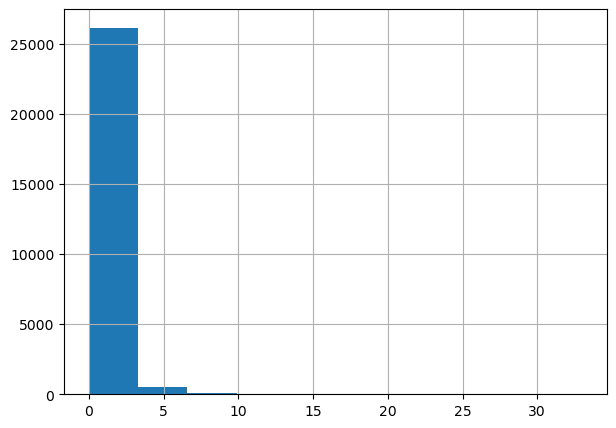

In [19]:
histogram('popularity')

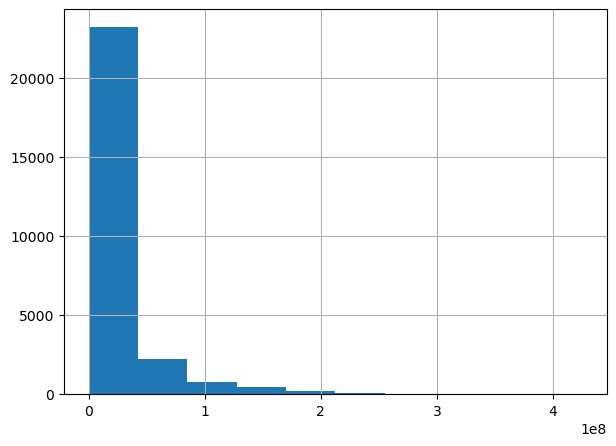

In [20]:
histogram('budget')

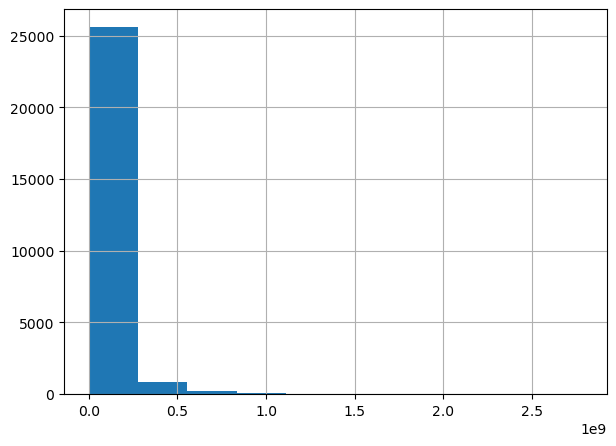

In [21]:
histogram('revenue')

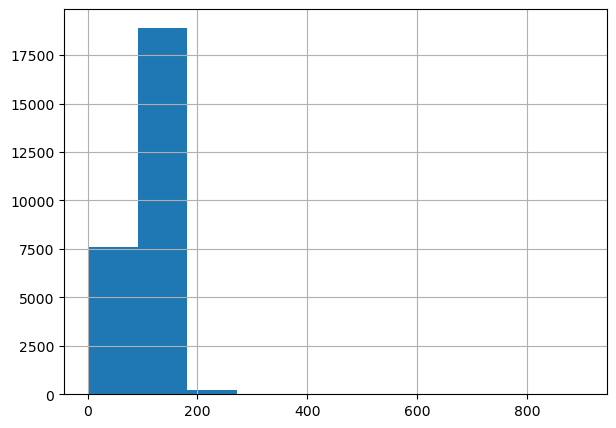

In [22]:
histogram('runtime')

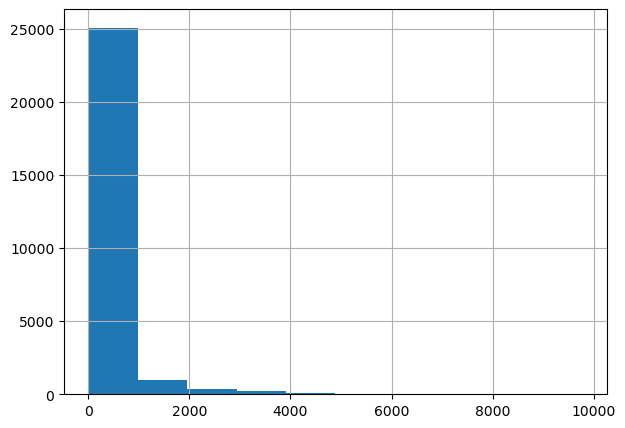

In [23]:
histogram('vote_count')

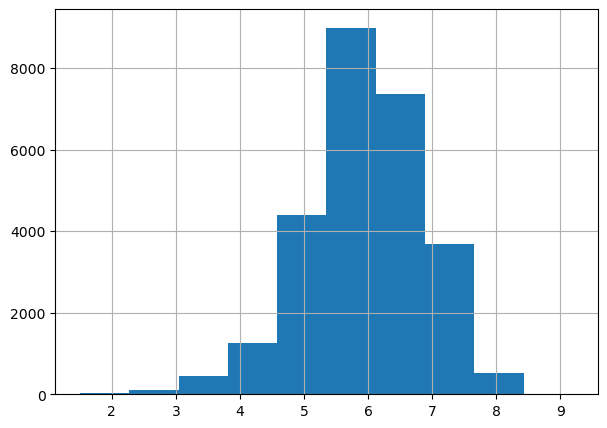

In [24]:
histogram('vote_average')

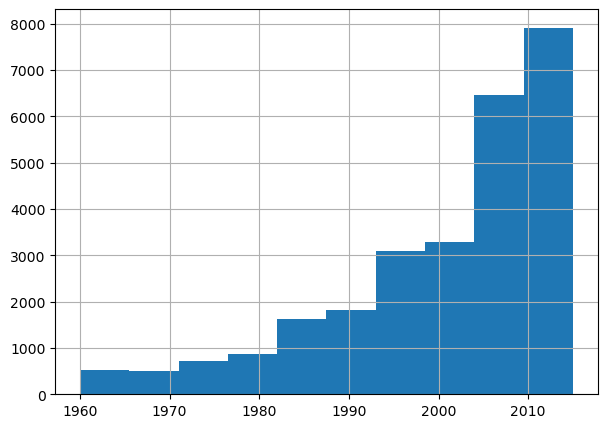

In [26]:
histogram('release_year')

### Q.1: Which genres are most popular from year to year?

In [27]:
df['genres'].value_counts()

Drama              4746
Comedy             3772
Thriller           2902
Action             2376
Romance            1703
Horror             1628
Adventure          1465
Crime              1352
Science Fiction    1222
Family             1221
Fantasy             911
Mystery             807
Animation           692
Documentary         506
Music               397
History             332
War                 270
Foreign             184
Western             164
TV Movie            159
Name: genres, dtype: int64

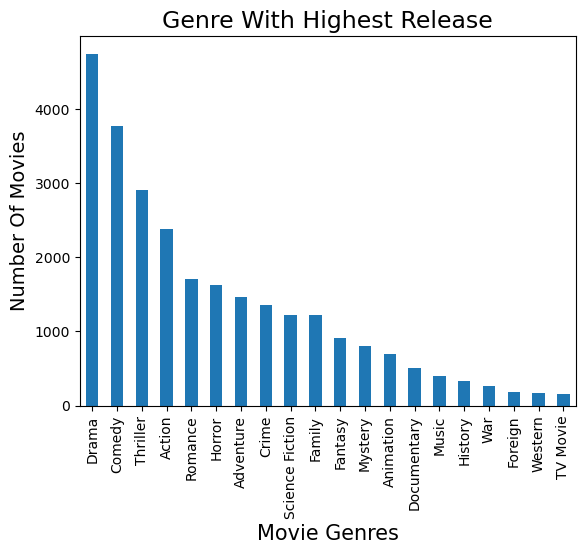

In [28]:
# create bar chart to show number of releases of each gerne
df['genres'].value_counts().plot(kind= 'bar')
#setup the title and the labels of the plot.
plt.title('Genre With Highest Release', fontsize=17)
plt.ylabel('Number Of Movies', fontsize=14)
plt.xlabel('Movie Genres', fontsize=15);

##### the figure above tells us that drama  is the most popular movie genre

### Q.2: Is revenue and release year have any correlation ?

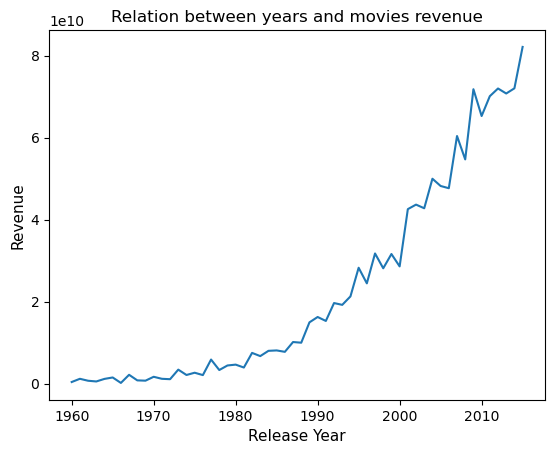

In [29]:
# filter data by release year and calculate sum of revenue for each year
revenue_year = df.groupby(['release_year']).revenue.sum()
# create plot for previous filter
plt.plot(revenue_year)
plt.title('Relation between years and movies revenue', fontsize=12)
plt.xlabel('Release Year', fontsize=11)
plt.ylabel('Revenue', fontsize=11);

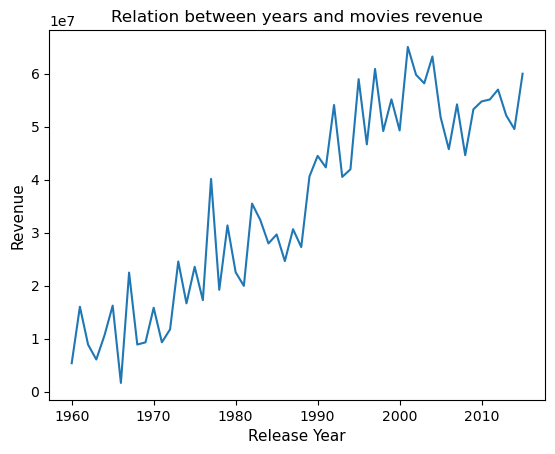

In [30]:
# filter data by release year and calculate sum of revenue for each year
revenue_year2 = df.groupby(['release_year']).revenue.mean()
# create plot for previous filter
plt.plot(revenue_year2)
plt.title('Relation between years and movies revenue', fontsize=12)
plt.xlabel('Release Year', fontsize=11)
plt.ylabel('Revenue', fontsize=11);

##### it's obviously that there is strongly positive correlation between release year and revenue

### Q.3: Correlation between budget and release years?

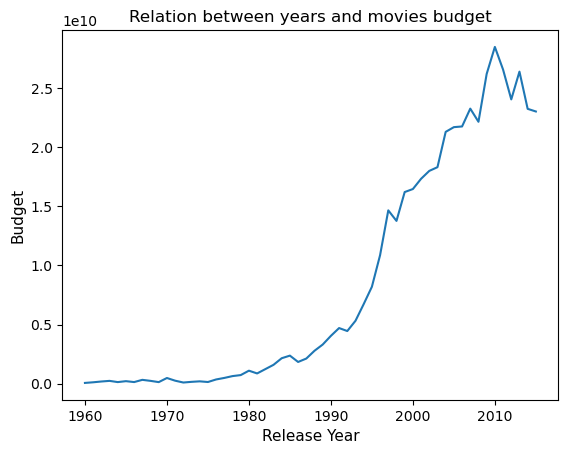

In [32]:
# filter data by release year and calculate sum of budget for each year
revenue_year = df.groupby(['release_year']).budget.sum()
# create plot for previous filter
plt.plot(revenue_year)
plt.title('Relation between years and movies budget', fontsize=12)
plt.xlabel('Release Year', fontsize=11)
plt.ylabel('Budget', fontsize=11);

##### it's also shown that there is positive correlation between release year and budget

### Q.4: How Does Popularity Depends On Profit?

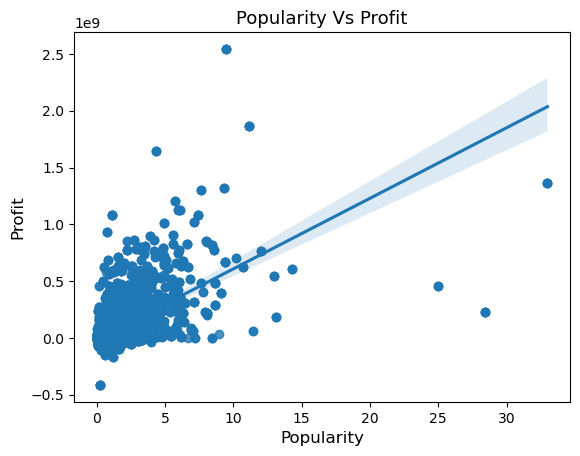

In [33]:
# add profit column by subtract budget from revenue
df['Profit'] = df['revenue'] - df['budget']
# create regplot
ax = sns.regplot(x=df['popularity'],y=df['Profit'])
ax.set_title("Popularity Vs Profit",fontsize=13)
ax.set_xlabel("Popularity",fontsize=12)
ax.set_ylabel("Profit",fontsize=12);

##### seems like a positive correlation

### Q.4: Top 10 directors who produces the most movies

In [34]:
df['director'].value_counts().head(10)

Woody Allen         105
Clint Eastwood       99
Steven Spielberg     80
Ridley Scott         72
Joel Schumacher      62
Martin Scorsese      60
Brian De Palma       59
Walter Hill          57
Richard Donner       57
John Carpenter       57
Name: director, dtype: int64

##### Woody Allen produces 105 movie !! wow

### Q.5: Longest to shortest movie.

In [35]:
df['runtime'].describe()

count    26809.000000
mean       103.052743
std         29.464634
min          2.000000
25%         90.000000
50%        100.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

##### the movies has average 103 mins duration

In [36]:
df['runtime'] = df['runtime'].astype(int)

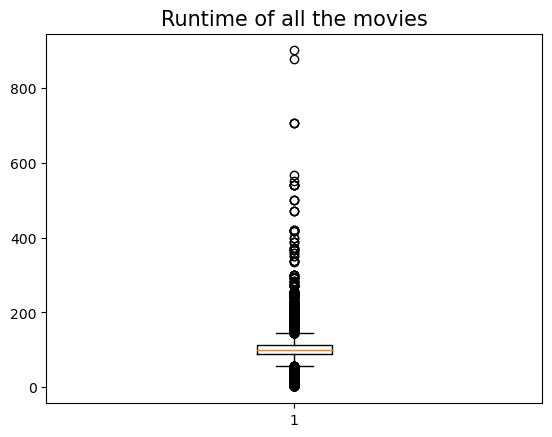

In [37]:
#plotting a histogram of runtime movies
plt.boxplot(df['runtime'])
plt.title('Runtime of all the movies', fontsize=15);

<a id='conclusions'></a>
## Conclusions

> In this analysis we answer this quistions:
    <li>Which genres are most popular from year to year?
    <li>Is revenue and release year have any correlation?
    <li>Correlation between budget and release years?
    <li>Top 10 directors who produces the most movies
    <li>Longest to shortest movie

## Limitations
 > the limitations in our data is:
 <li>The genres and cast columns was contain many details which should be in seperate columns.
 <li>There were much of null values in production company so we drop it.
 <li>We are not sure if the data provided to us is completel correct and up-to-date, duo to the continuous change in revenue, popularity, and votes.

In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1